In [1]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
from keras import models
from keras import layers
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [13]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [14]:
digit = train_images[4]

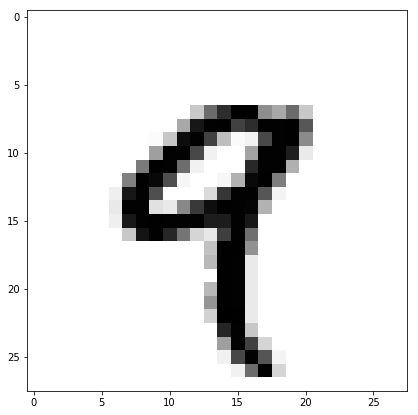

In [16]:
plt.close('all')
fig, ax = plt.subplots(1, figsize=(7, 7))
ax.imshow(digit, cmap=plt.cm.binary)

In [17]:
type(train_images), train_images.shape, type(test_images), test_images.shape

(numpy.ndarray, (60000, 28, 28), numpy.ndarray, (10000, 28, 28))

In [18]:
type(train_labels), train_labels.shape

(numpy.ndarray, (60000,))

In [19]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255


In [20]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [21]:
train_labels.shape, train_labels

((60000, 10), array([[0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]], dtype=float32))

In [22]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
network.compile(
    optimizer='rmsprop', 
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [23]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 6s 94us/step - loss: 0.2552 - acc: 0.9260
Epoch 2/5
60000/60000 [==============================] - 5s 84us/step - loss: 0.1028 - acc: 0.9694
Epoch 3/5
60000/60000 [==============================] - 6s 95us/step - loss: 0.0687 - acc: 0.9789
Epoch 4/5
60000/60000 [==============================] - 6s 92us/step - loss: 0.0496 - acc: 0.9847
Epoch 5/5
60000/60000 [==============================] - 6s 96us/step - loss: 0.0371 - acc: 0.9890


In [24]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_accuracy: {0:}'.format(test_acc))

10000/10000 [==============================] - 0s 47us/step
test_accuracy: 0.9807
